## Importing Libraries



In [18]:
import random
import numpy as np

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

## Setting the seed

In [19]:
random.seed(1)
torch.manual_seed(1)

## Downloading MNIST Train Data and Test Data

In [20]:
train_transform = transforms.Compose([
                        transforms.ToTensor()])
test_transform = transforms.Compose([
                        transforms.ToTensor()])
                  
train_data = torchvision.datasets.MNIST(root='./MNISTdata', train=True, download=True, transform=train_transform)
test_data = torchvision.datasets.MNIST(root='./MNISTdata', train=False, download=True, transform=test_transform)
print(f'Training set of {len(train_data)} examples, and a test set of {len(test_data)} examples: ')

Training set of 60000 examples, and a test set of 10000 examples: 


## Custom Data

In [21]:
class CustomDataset(Dataset):
    
    def __init__(self, data):
        self.data = data
        
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        image, label = self.data[index]

        image = image.reshape(1,28,28)

        # Create one hot encoding for mnist 
        rand_num = random.randint(0,9)
        rand_num_ohe = torch.zeros(11).long()
        rand_num_ohe[rand_num] = 1
        rand_num_ohe = rand_num_ohe[:-1]

        # add actual label and random number
        sum = label + rand_num

        return image, label, rand_num_ohe, sum

    def __len__(self):
        return len(self.data)

train_data = CustomDataset(train_data)
test_data = CustomDataset(test_data)

## Creating Data Loaders

In [22]:
num_workers = 2
batch_size = 128
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers,
                          pin_memory=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers,
                          pin_memory=True, drop_last=True)

## Understanding and Visualising the data

In [23]:
images, labels, randomNumbers, sums = next(iter(train_loader))

print('Images: ', images.shape)
print('Labels: ', labels.shape)
print('Random Numbers: ', randomNumbers.shape)
print('Sum: ', sums.shape)

print('\nLabels: ', labels)
print('Random Numbers: ', randomNumbers)
print('Sum: ', sums)

Images:  torch.Size([128, 1, 28, 28])
Labels:  torch.Size([128])
Random Numbers:  torch.Size([128, 10])
Sum:  torch.Size([128])

Labels:  tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3, 6, 5, 9, 5, 2, 3, 5, 3, 5, 8, 9, 2,
        7, 1, 2, 4, 0, 2, 0, 6, 7, 2, 9, 5, 7, 1, 2, 2, 3, 3, 8, 8, 1, 0, 5, 7,
        5, 9, 6, 7, 2, 5, 9, 7, 5, 7, 1, 7, 8, 7, 8, 8, 8, 2, 1, 4, 1, 1, 3, 2,
        9, 5, 1, 9, 0, 3, 0, 3])
Random Numbers:  tensor([[0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])
Sum:  tensor([11, 16, 13, 15,  7,  1,  7, 13, 10,  8,  7, 14,  8, 14, 10,  8,  6,  7,
        10,  8, 14,  8, 17, 13,  8,  1,  5,  7, 11,  8,  6, 10, 17, 15,  9, 10,
         8, 11, 12, 15, 13, 

In [24]:
images, labels, randomNumbers, sums = next(iter(test_loader))

print('Images: ', images.shape)
print('Labels: ', labels.shape)
print('Random Numbers: ', randomNumbers.shape)
print('Sum: ', sums.shape)

print('\nLabels: ', labels)
print('Random Numbers: ', randomNumbers)
print('Sum: ', sums)

Images:  torch.Size([128, 1, 28, 28])
Labels:  torch.Size([128])
Random Numbers:  torch.Size([128, 10])
Sum:  torch.Size([128])

Labels:  tensor([8, 2, 3, 3, 4, 3, 4, 5, 3, 9, 4, 9, 1, 8, 6, 4, 0, 7, 8, 6, 9, 4, 8, 0,
        2, 0, 9, 4, 7, 1, 6, 9, 5, 6, 0, 5, 2, 4, 3, 6, 3, 3, 4, 3, 0, 0, 1, 1,
        7, 8, 1, 4, 9, 3, 7, 5, 7, 2, 9, 6, 5, 3, 4, 8, 3, 1, 9, 8, 2, 5, 5, 8,
        1, 4, 0, 1, 2, 7, 1, 4, 9, 1, 8, 5, 2, 5, 1, 3, 3, 6, 8, 8, 8, 5, 0, 1,
        5, 7, 1, 4, 0, 7, 8, 0, 0, 9, 6, 4, 2, 2, 6, 8, 6, 4, 0, 2, 8, 7, 7, 8,
        9, 0, 5, 3, 1, 5, 7, 1])
Random Numbers:  tensor([[0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
Sum:  tensor([16, 11,  3,  4, 11,  7,  9, 10,  4, 11, 10, 16,  4,  8, 15,  6,  2, 10,
         8, 12, 10,  8, 11,  7, 11,  6, 13,  4, 14,  5, 11, 15, 13,  6,  0,  6,
         6, 10,  8, 10, 12, 

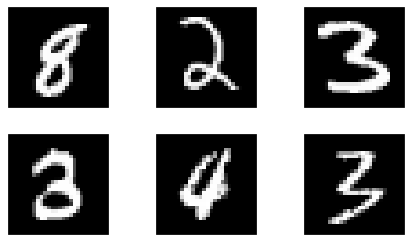

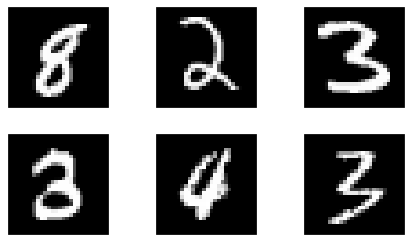

In [25]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
fig

## Defining Neural Network

In [26]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)       #Input: 28*28*1  Output:26 * 26 * 32 GRF:3 * 3 
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)      #Input: 26*26*32 Output:24 * 24 * 64 GRF:5 * 5
        self.pool1 = nn.MaxPool2d(2, 2)                   #Input: 24*24*64 Output:12 * 12 * 64 GRF:10*10
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)     #Input: 28*28*1  Output:26 * 26 * 32 GRF:12*12
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)    #Input: 28*28*1  Output:26 * 26 * 32 GRF:14*14
        self.pool2 = nn.MaxPool2d(2, 2)                   #Input: 28*28*1  Output:26 * 26 * 32 GRF:28*28
        self.conv5 = nn.Conv2d(256, 512, 3)               #Input: 28*28*1  Output:26 * 26 * 32 GRF:30*30
        self.conv6 = nn.Conv2d(512, 1024, 3)              #Input: 28*28*1  Output:26 * 26 * 32 GRF:32*32
        self.conv7 = nn.Conv2d(1024, 10, 3)               #Input: 28*28*1  Output:26 * 26 * 32 GRF:34*34
        
        # second input one-hot encoded random number (1x10) will be concatenated
        self.fc1 = nn.Linear(20, 128)
        self.fc2 = nn.Linear(128, 19)

    def forward(self, x, rand_num):
        """
        Model returns two outputs:
        Output1 : "number" represented by the MNIST image 
        Output2 : the "sum" of this number with the random number that was generated and sent as the input to the network
        """
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = self.conv7(x)
        
        x = x.view(-1, 10)

        # concatenate second input 
        x_rand_num_sum = torch.cat((x, rand_num), dim=1)

        # Further train the network on Dense Layer
        x_rand_num_sum = F.relu(self.fc1(x_rand_num_sum))
        x_rand_num_sum = self.fc2(x_rand_num_sum)

        return F.log_softmax(x, dim=1), F.log_softmax(x_rand_num_sum, dim=1)

## Train Function

In [27]:
def train(model, device, train_loader, optimizer, epoch):
    # set the model in training model
    model.train()

    epoch_loss = 0

    pbar = tqdm(train_loader)
    # run for all the data in train_loader
    for batch_idx, (data, target, random_number, sum) in enumerate(pbar):

        # fetch the data and the target values
        target = target.type(torch.LongTensor)
        sum = sum.type(torch.LongTensor)

        # move the data to device
        data, target, sum = data.to(device), target.to(device), sum.to(device)

        # zero out the gradients
        optimizer.zero_grad()

        # forward pass the model with the data
        output1, output2 = model(data, random_number.to(device))

        # compute the loss occured
        loss1 = F.nll_loss(output1, target)
        loss2 = F.nll_loss(output2, sum)
        loss = (loss1 + loss2)/2

        epoch_loss += loss.item()

        # compute the backward gradients
        loss.backward()

        # update the optimizer params
        optimizer.step()
    
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
    
    train_loss = epoch_loss / len(train_loader)

    return train_loss

## Test Function

In [28]:
def test(model, device, test_loader):
    
    # set the model in evaluation model
    model.eval()

    # set the loss to zero
    test_loss = 0
    
    # the number of correct classifications
    correct1 = 0
    correct2 = 0

    # turn off gradients during the testing
    with torch.no_grad():
        for (data, target, random_number, sum) in test_loader:

            # move the data to device
            target = target.type(torch.LongTensor)
            sum = sum.type(torch.LongTensor)
            data, target,sum = data.to(device), target.to(device), sum.to(device)

            # forward pass the model and get the output
            output1,output2 = model(data,random_number.to(device))

            # accumulate the loss from both the network outputs
            test_loss += (F.nll_loss(output1, target, reduction='sum').item() + F.nll_loss(output2, sum, reduction='sum').item())/2

            # get the index of max log-probability
            pred1 = output1.argmax(dim=1, keepdim=True)
            pred2 = output2.argmax(dim=1, keepdim=True)

            # increment the correct prediction count if pred is correct
            correct1 += pred1.eq(target.view_as(pred1)).sum().item()
            correct2 += pred2.eq(sum.view_as(pred2)).sum().item()


    # test loss divided by the total number of items in test dataset
    test_loss /= len(test_loader.dataset)
    print(f'Test set: Average loss: {test_loss:.3f}', 
          f'MNist Accuracy: {100. * correct1/len(test_loader.dataset)}',
          f'Sum_Accuracy: {100. * correct2/len(test_loader.dataset)}')
    return test_loss

## Testing for GPU


In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


## Move the model to the specified device

In [30]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(1024, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=19, bias=True)
)


## Checking the total number of parameters

In [31]:
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total trainable parameters {total_trainable_params}')

Total trainable parameters 6384925


## Training the model

In [32]:
# use Stochastic Gradient Descent as the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

# set the number of epochs to train for
num_epoch = 20

train_loss_values = []
valid_loss_values = []

# run it for epoch number of times
for epoch in range(1, num_epoch+1):
    print('\nEpoch {} : '.format(epoch))
    # train the model
    train_loss = train(model, device, train_loader, optimizer, epoch)
    # test the model
    test_loss = test(model, device, test_loader)

    train_loss_values.append(train_loss)
    valid_loss_values.append(test_loss)


Epoch 1 : 


loss=2.4098801612854004 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.75it/s]


Test set: Average loss: 2.394 MNist Accuracy: 56.34 Sum_Accuracy: 9.94

Epoch 2 : 


loss=1.2987701892852783 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 1.296 MNist Accuracy: 94.29 Sum_Accuracy: 14.32

Epoch 3 : 


loss=1.185538411140442 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.78it/s]


Test set: Average loss: 1.207 MNist Accuracy: 96.57 Sum_Accuracy: 18.48

Epoch 4 : 


loss=1.1331839561462402 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.78it/s]


Test set: Average loss: 1.132 MNist Accuracy: 97.5 Sum_Accuracy: 26.86

Epoch 5 : 


loss=1.0485321283340454 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.84it/s]


Test set: Average loss: 1.060 MNist Accuracy: 98.04 Sum_Accuracy: 36.98

Epoch 6 : 


loss=0.9563050270080566 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.990 MNist Accuracy: 98.19 Sum_Accuracy: 48.15

Epoch 7 : 


loss=0.9026076793670654 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.83it/s]


Test set: Average loss: 0.907 MNist Accuracy: 98.24 Sum_Accuracy: 60.81

Epoch 8 : 


loss=0.8417448401451111 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.84it/s]


Test set: Average loss: 0.817 MNist Accuracy: 98.5 Sum_Accuracy: 71.26

Epoch 9 : 


loss=0.7439426183700562 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.81it/s]


Test set: Average loss: 0.721 MNist Accuracy: 98.69 Sum_Accuracy: 78.29

Epoch 10 : 


loss=0.6082207560539246 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.81it/s]


Test set: Average loss: 0.630 MNist Accuracy: 98.71 Sum_Accuracy: 85.94

Epoch 11 : 


loss=0.5498422384262085 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.78it/s]


Test set: Average loss: 0.544 MNist Accuracy: 98.74 Sum_Accuracy: 90.52

Epoch 12 : 


loss=0.4379905164241791 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.457 MNist Accuracy: 98.84 Sum_Accuracy: 94.8

Epoch 13 : 


loss=0.32054609060287476 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.375 MNist Accuracy: 98.87 Sum_Accuracy: 96.65

Epoch 14 : 


loss=0.3123644292354584 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.80it/s]


Test set: Average loss: 0.306 MNist Accuracy: 98.92 Sum_Accuracy: 97.72

Epoch 15 : 


loss=0.23556731641292572 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.250 MNist Accuracy: 98.87 Sum_Accuracy: 98.01

Epoch 16 : 


loss=0.19917763769626617 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.83it/s]


Test set: Average loss: 0.202 MNist Accuracy: 98.95 Sum_Accuracy: 98.59

Epoch 17 : 


loss=0.17915618419647217 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.80it/s]


Test set: Average loss: 0.170 MNist Accuracy: 99.0 Sum_Accuracy: 98.62

Epoch 18 : 


loss=0.11908458918333054 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.142 MNist Accuracy: 98.99 Sum_Accuracy: 98.72

Epoch 19 : 


loss=0.11350075155496597 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.83it/s]


Test set: Average loss: 0.129 MNist Accuracy: 98.9 Sum_Accuracy: 98.54

Epoch 20 : 


loss=0.1045355424284935 batch_id=467: 100%|██████████| 468/468 [00:39<00:00, 11.79it/s]


Test set: Average loss: 0.110 MNist Accuracy: 98.96 Sum_Accuracy: 98.83


## Plotting the loss function


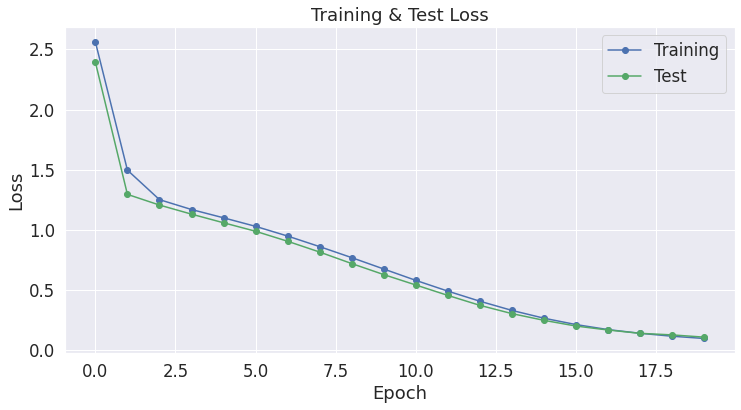

In [33]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(np.array(train_loss_values), 'b-o', label="Training")
plt.plot(np.array(valid_loss_values), 'g-o', label="Test")

# Label the plot.
plt.title("Training & Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
#plt.xticks([1, 2, 3, 4])

plt.show()

## Inference

In [34]:
def prediction(image, rand_num):

    rand_num_ohe = torch.zeros(11).long()
    rand_num_ohe[rand_num] = 1
    rand_num_ohe = rand_num_ohe[:-1]

    output_1, output_2 = model(image.unsqueeze(dim=1).to(device), rand_num_ohe.reshape(-1,10).to(device))

    mnist_pred = output_1.argmax(dim=1, keepdim=True)
    sum_pred = output_2.argmax(dim=1, keepdim=True)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(3, 3, 1)
    ax.axis('off')
    ax.imshow(image.cpu().numpy().squeeze())
    ax.set_title(f'MNIST Image (input1): \n')
    ax.text(15, 45, f'Random Number Generated (input2): {rand_num}', horizontalalignment='center')            
    ax.text(15, 60, f'MNIST Prediction (output1): {mnist_pred.item()}', horizontalalignment='center')
    ax.text(15, 75, f'Sum (output2): {rand_num} + {mnist_pred.item()} = {sum_pred.item()}', horizontalalignment='center')
    
    return mnist_pred, sum_pred

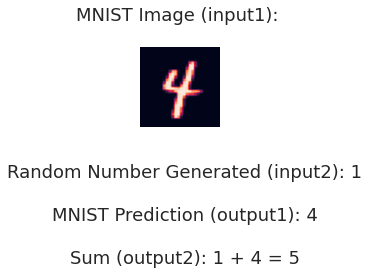

In [35]:
image, _, _, _ = test_data[random.randint(1,10000)]
rand_num = random.randint(0,9)
mnist_pred, sum_pred = prediction(image, rand_num)

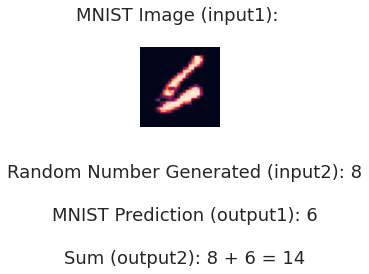

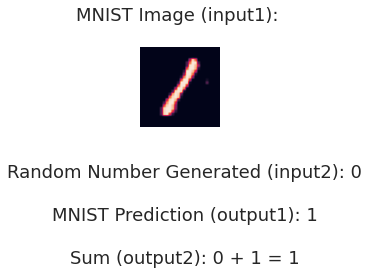

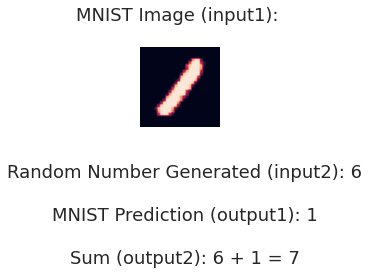

In [40]:
for i in range(3):
    image, _, _, _ = test_data[random.randint(1,10000)]
    rand_num = random.randint(0,9)
    mnist_pred, sum_pred = prediction(image, rand_num)